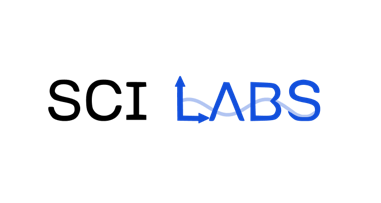

In [ ]:
#nacitanie kniznic
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

 # Slnečné škvrny a solárny cyklus

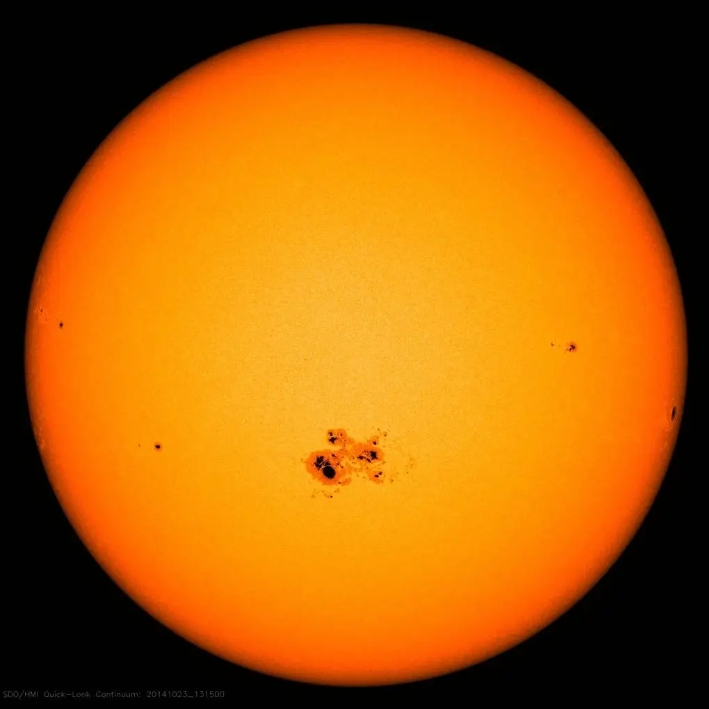

Slnečné škvrny sú tmavé oblasti na povrchu Slnka, ktoré sú chladnejšie ako okolité oblasti. Vznikajú v dôsledku silných magnetických polí, ktoré brzdia prenos tepla z vnútra Slnka na jeho povrch. Slnečné škvrny sa objavujú v cykloch, pričom počet škvŕn sa mení v priebehu solárneho cyklu. Našou úlohou bude pomocou verených dat o solárnych škrvnách z obdobia 1818 až 2019 určiť túto periódu. Počas období vysokého počtu škvŕn, nazývaných slnečné maximum, je Slnko magneticky aktívnejšie, čo môže ovplyvniť vesmírne počasie a prejaviť sa napríklad polárnymi žiarami na Zemi.

In [ ]:
# Nacitanie dat
data = pd.read_csv('sunspot_data.csv')

#Zdroj dat : https://www.kaggle.com/datasets/abhinand05/daily-sun-spot-data-1818-to-2019/data


# Pozrieme sa na prvých pár riadkov našich dat
data.head()


,Unnamed: 0,Year,Month,Day,Date In Fraction Of Year,Number of Sunspots,Standard Deviation,Observations,Indicator
0,0,1818,1,1,1818.001,-1,-1.0,0,1
1,1,1818,1,2,1818.004,-1,-1.0,0,1
2,2,1818,1,3,1818.007,-1,-1.0,0,1
3,3,1818,1,4,1818.010,-1,-1.0,0,1
4,4,1818,1,5,1818.012,-1,-1.0,0,1


Ako môžme vidieť, v dátach sa nachádzajú chybné údaje. -1 zaznamenaných škvrn totižto znamená chýbajúci údaj. Táto informácia sa nachádza v popise datasetu (viď. zdroj). Je preto vhodné si dáta vyčistiť a pracovať iba s plnehodnotnými údajmi.

In [ ]:
# Vymeníme vsetky  (-1) za NaN (anglicky Not a Number) je špeciálna hodnota v počítačových výpočtoch a dátových súboroch,
# ktorá sa používa na označenie, že daná hodnota nie je číselná alebo je neplatná
data['Number of Sunspots'].replace(-1, pd.NA, inplace=True)

# Jednoducho sa zbavíme všetkých riadkov s hodnotou NaN
clean_data = data.dropna(subset=['Number of Sunspots'])



C:\Users\aminnakh\AppData\Local\Temp\ipykernel_23264\3728869200.py:3: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





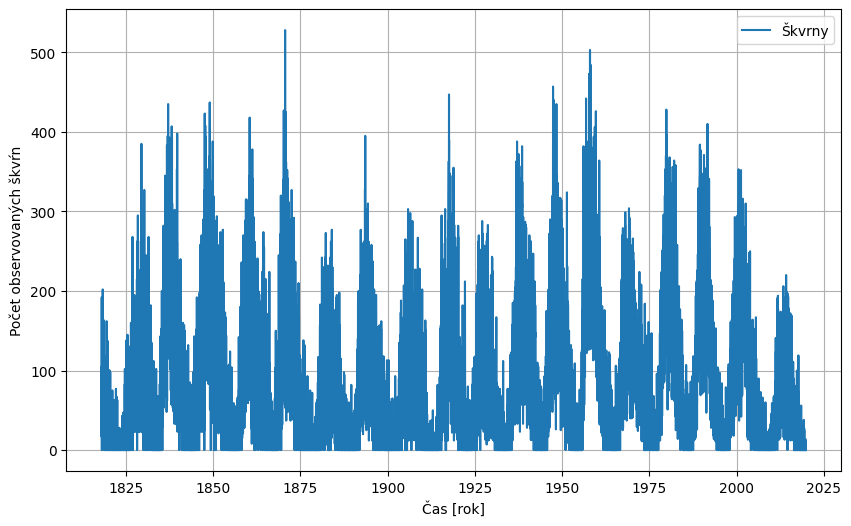

In [ ]:
# Vykreslíme si graf škvŕn. V stĺpci 'Date In Fraction Of Year' máme už pripravený čas ako presný zlomok roku,
# čiže dáta môžeme vyniesť na osu y zatiaľ čo na osi x bude čas v jednotkách jeden rok
plt.figure(figsize=(10, 6))
plt.plot(clean_data['Date In Fraction Of Year'], clean_data['Number of Sunspots'], label='Škvrny')
plt.xlabel('Čas [rok]')
plt.ylabel('Počet observovaných škvŕn')
plt.grid(True)
plt.legend()
plt.show()


Niekedy je vhodné sa na dáta pozrieť v takzvanom rolling average, kde data zamenime za hodnotu z priemeru niekoľko údajov. Napriklád môžeme zvoliť jeden mesiac.

C:\Users\aminnakh\AppData\Local\Temp\ipykernel_23264\4119658865.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



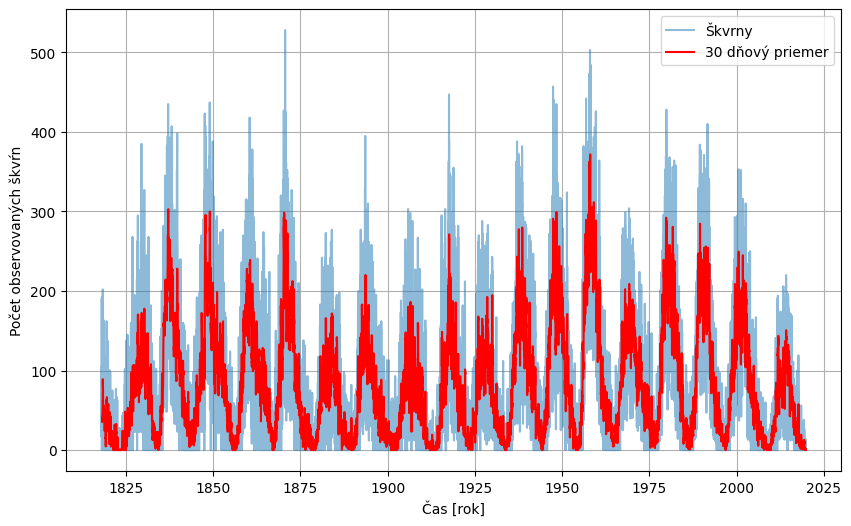

In [ ]:
# Vypocitame si 30 dnovu priemernu hodnotu
clean_data['Sunspot_MA_30'] = clean_data['Number of Sunspots'].rolling(window=30).mean()

# Vykreslime
plt.figure(figsize=(10, 6))
plt.plot(clean_data['Date In Fraction Of Year'], clean_data['Number of Sunspots'], label='Škvrny', alpha=0.5)
plt.plot(clean_data['Date In Fraction Of Year'], clean_data['Sunspot_MA_30'], label='30 dňový priemer', color='red')
plt.xlabel('Čas [rok]')
plt.ylabel('Počet observovaných škvŕn')
plt.grid(True)
plt.legend()
plt.show()


Pre určenie dlžky cyklu u periodických dát je dobré sledovať opakujúce sa javy a to napríklad minimum alebo maximum

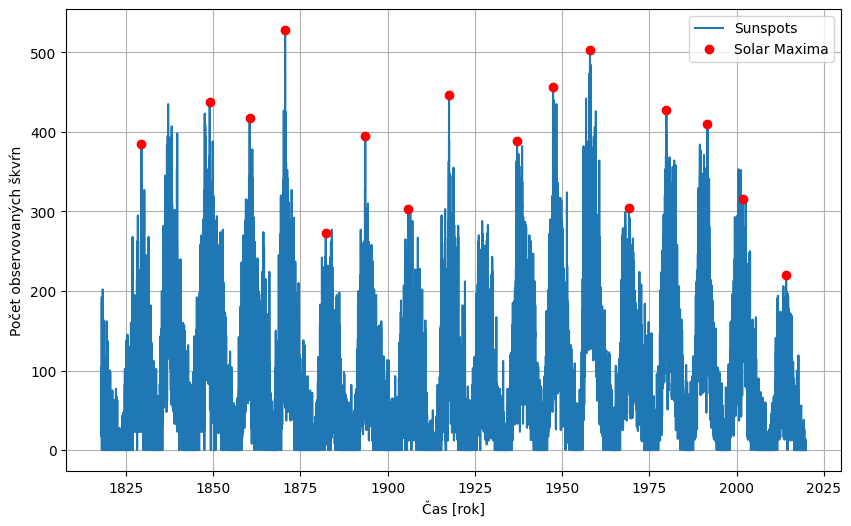

In [ ]:

# Najdeme maximum
peaks, _ = find_peaks(clean_data['Number of Sunspots'], distance = 3650)

# Vykreslíme
plt.figure(figsize=(10, 6))
plt.plot(clean_data['Date In Fraction Of Year'], clean_data['Number of Sunspots'], label='Sunspots')
plt.plot(clean_data.iloc[peaks]['Date In Fraction Of Year'], clean_data.iloc[peaks]['Number of Sunspots'], 'ro', label='Solar Maxima')
plt.xlabel('Čas [rok]')
plt.ylabel('Počet observovaných škvŕn')
plt.grid(True)
plt.legend()
plt.show()


No niekedy je úplne najjednoduchším spôsobom ručne odhadnúť maximum alebo minimum a spriemerovať. Nato nám však naše grafy doteraz neboli dostačujúce. Teraz použijeme interaktínu knižnicu na vykreslenie dát znovu.

In [ ]:
import plotly.express as px


# Tvorba interaktivneho grafu pomocou kniznice plotly
fig = px.line(clean_data,
              x="Date In Fraction Of Year",
              y="Number of Sunspots",
              title='Interaktívny graf detekovaných škvrn',
              labels={"Date In Fraction Of Year": "Čas [rok]", "Number of Sunspots": "Počet observovaných škvŕn"})

fig.show()

Takto môžeme určiť, že solárny cyklus ma približne 9-13 rokov. Väčšinou sa údáva 11 rokov. Ďalšou zaujímavosťou sú polohy škvrn a ako sa mení poćas cyklu. Toto bohužial v našich dátach nie je, preto nám poslúži tento obrázok

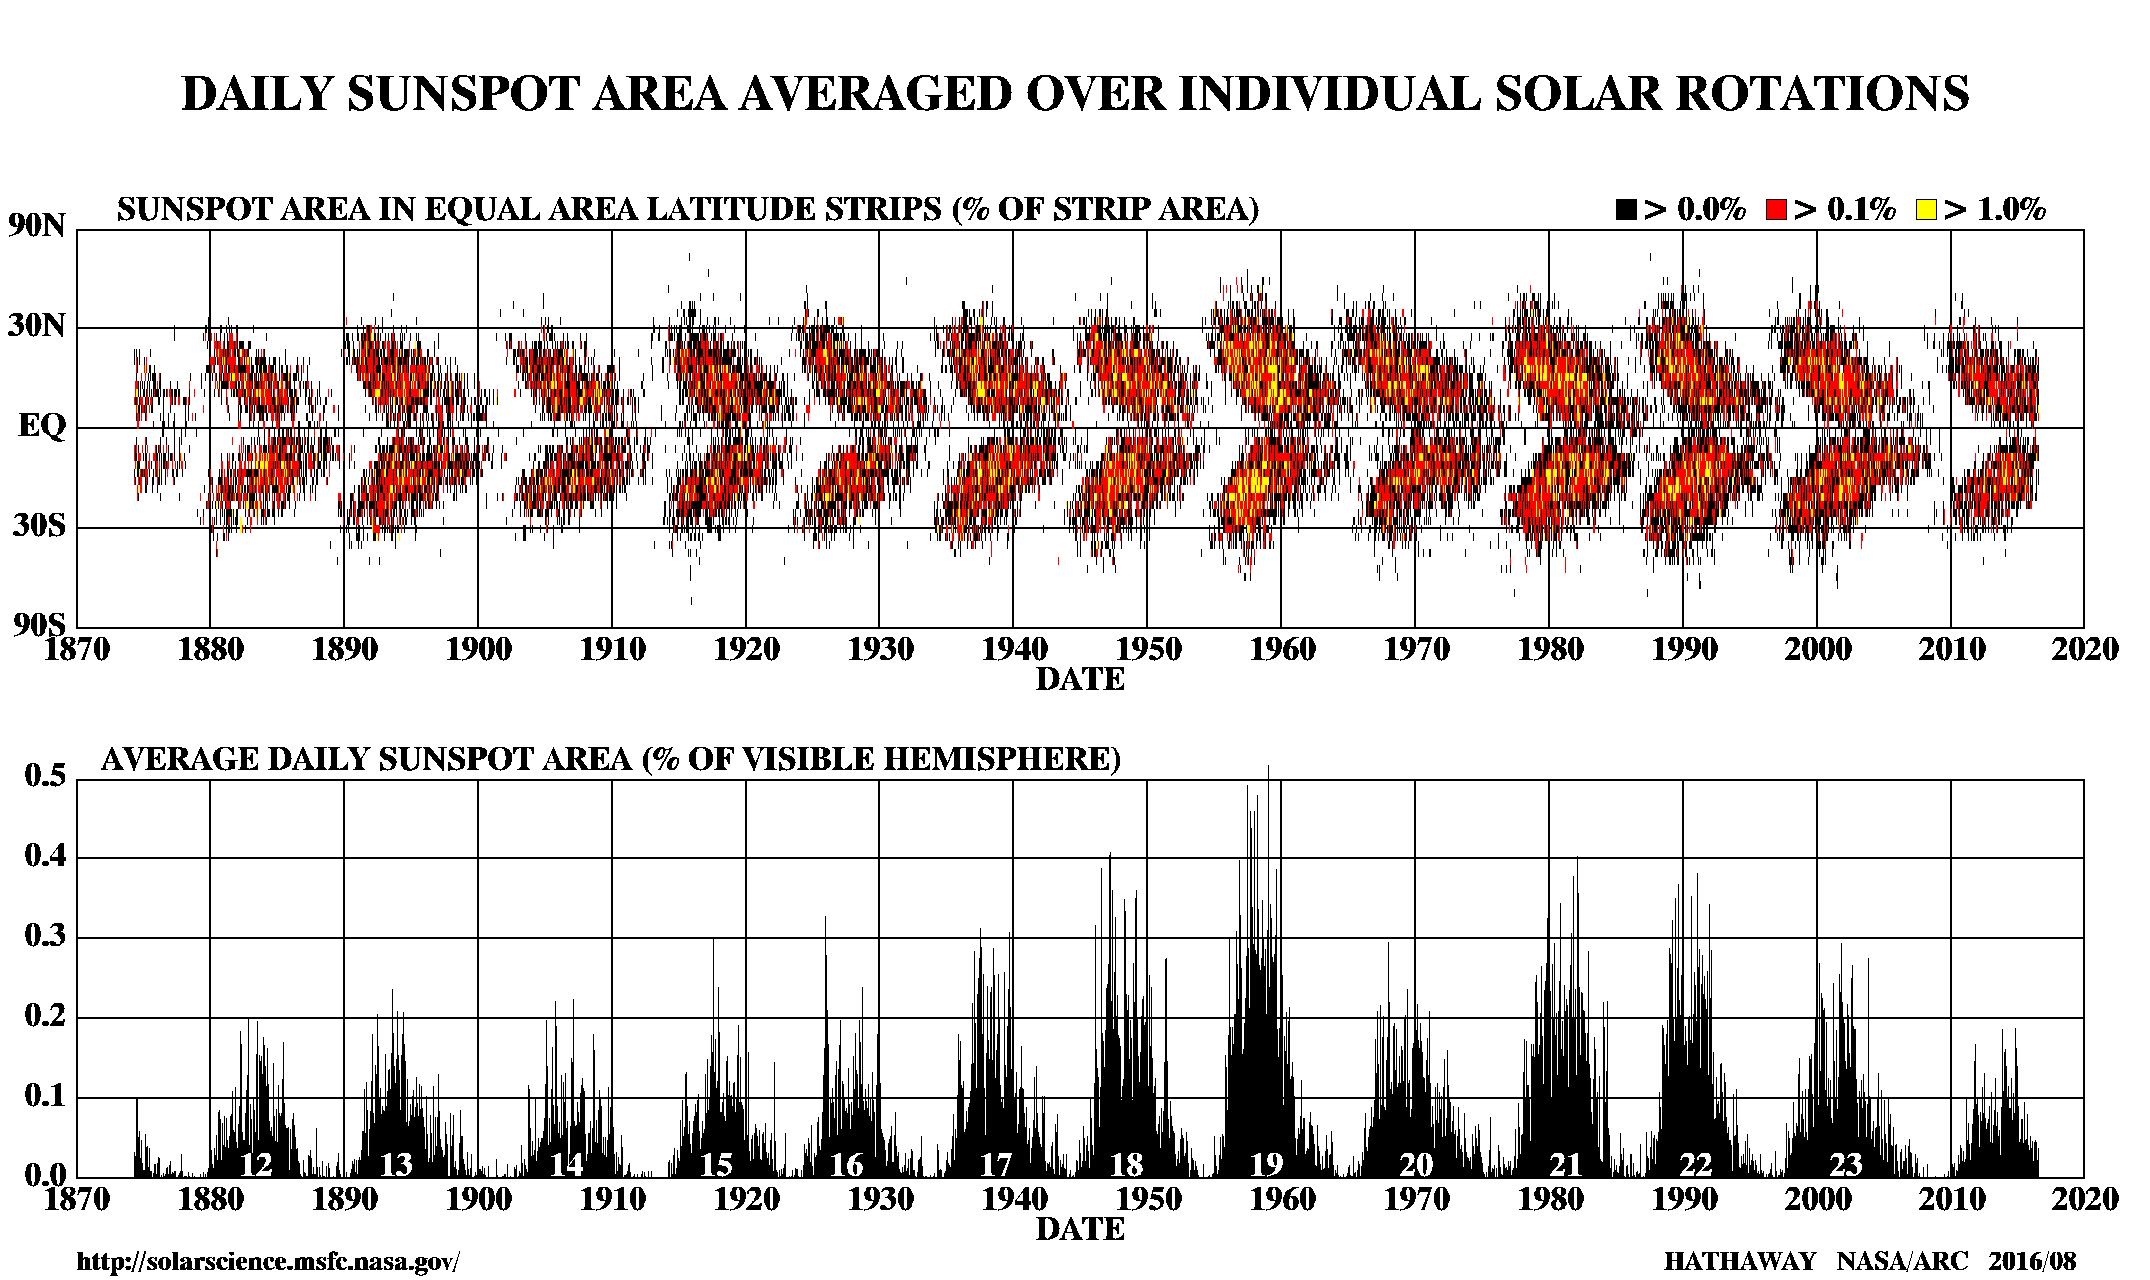